In [88]:
from standardInclude import *

In [89]:
#f = r.TFile("./data/gm2offline_ana.root")
#f = r.TFile("./data/gm2offline_ana_onlyAboveThresholdClusters.root")
#f = r.TFile("./data/results_9files_truncationComparison.root")
#f = r.TFile("./data/gm2offline_ana_sameClustering.root")
f = r.TFile("./data/results_10MissingOutputFiles_9day_histOnly.root")
f.ls()

TFile**		./data/results_10MissingOutputFiles_9day_histOnly.root	
 TFile*		./data/results_10MissingOutputFiles_9day_histOnly.root	
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	farlineTrunc;1	farlineTrunc (CaloFarlineHistograms) folder
  KEY: TDirectoryFile	clusterCompare;1	clusterCompare (ReconComparisonTruncatedVsFull) folder


In [90]:
f.cd("clustersAndCoincidences")
f.ls()

TFile**		./data/results_10MissingOutputFiles_9day_histOnly.root	
 TFile*		./data/results_10MissingOutputFiles_9day_histOnly.root	
  TDirectoryFile*		clustersAndCoincidences	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
   KEY: TH3I	clusters;1	clusters
   KEY: TH2I	triples;1	triples
   KEY: TH2I	coincidenceTimeDiffs;1	coincidence time differences
   KEY: TH2I	quadruples;1	quadruples
   KEY: TH1I	coincidenceEnergies;1	coincidence energies
   KEY: TH2I	backwardsTriples;1	backwards triples
   KEY: TH2I	backwardsCoincidenceTimeDiffs;1	backwards coincidence time differences
   KEY: TH1I	backwardsCoincidenceEnergies;1	backwards coincidence energies
   KEY: TH1I	ctag;1	ctag
  KEY: TDirectoryFile	clustersAndCoincidences;1	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	clustersAndCoincidencesTrunc;1	clustersAndCoincidencesTrunc (ClusterAndCoincidenceHistograms) folder
  KEY: TDirectoryFile	farline;1	farline (CaloFarlineHistograms) folder

In [91]:
f.cd("farline")
f.ls()

TFile**		./data/results_10MissingOutputFiles_9day_histOnly.root	
 TFile*		./data/results_10MissingOutputFiles_9day_histOnly.root	
  TDirectoryFile*		clustersAndCoincidences	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
   KEY: TH3I	clusters;1	clusters
   KEY: TH2I	triples;1	triples
   KEY: TH2I	coincidenceTimeDiffs;1	coincidence time differences
   KEY: TH2I	quadruples;1	quadruples
   KEY: TH1I	coincidenceEnergies;1	coincidence energies
   KEY: TH2I	backwardsTriples;1	backwards triples
   KEY: TH2I	backwardsCoincidenceTimeDiffs;1	backwards coincidence time differences
   KEY: TH1I	backwardsCoincidenceEnergies;1	backwards coincidence energies
   KEY: TH1I	ctag;1	ctag
  TDirectoryFile*		farline	farline (CaloFarlineHistograms) folder
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectory

In [92]:
f.cd("clusterCompare")
f.ls()

TFile**		./data/results_10MissingOutputFiles_9day_histOnly.root	
 TFile*		./data/results_10MissingOutputFiles_9day_histOnly.root	
  TDirectoryFile*		clustersAndCoincidences	clustersAndCoincidences (ClusterAndCoincidenceHistograms) folder
   KEY: TH3I	clusters;1	clusters
   KEY: TH2I	triples;1	triples
   KEY: TH2I	coincidenceTimeDiffs;1	coincidence time differences
   KEY: TH2I	quadruples;1	quadruples
   KEY: TH1I	coincidenceEnergies;1	coincidence energies
   KEY: TH2I	backwardsTriples;1	backwards triples
   KEY: TH2I	backwardsCoincidenceTimeDiffs;1	backwards coincidence time differences
   KEY: TH1I	backwardsCoincidenceEnergies;1	backwards coincidence energies
   KEY: TH1I	ctag;1	ctag
  TDirectoryFile*		farline	farline (CaloFarlineHistograms) folder
   KEY: TDirectoryFile	calo1;1	calo1
   KEY: TDirectoryFile	calo2;1	calo2
   KEY: TDirectoryFile	calo3;1	calo3
   KEY: TDirectoryFile	calo4;1	calo4
   KEY: TDirectoryFile	calo5;1	calo5
   KEY: TDirectoryFile	calo6;1	calo6
   KEY: TDirectory

---

# Let's start by comparing the wiggle plots

In [93]:
w1 = f.Get("farline").Get("allCaloWiggle").Clone("w1")
w1.SetTitle("Full Islands")
w2 = f.Get("farlineTrunc").Get("allCaloWiggle").Clone("w2")
w2.SetTitle("Truncated Islands")
w2.SetLineColor(2)

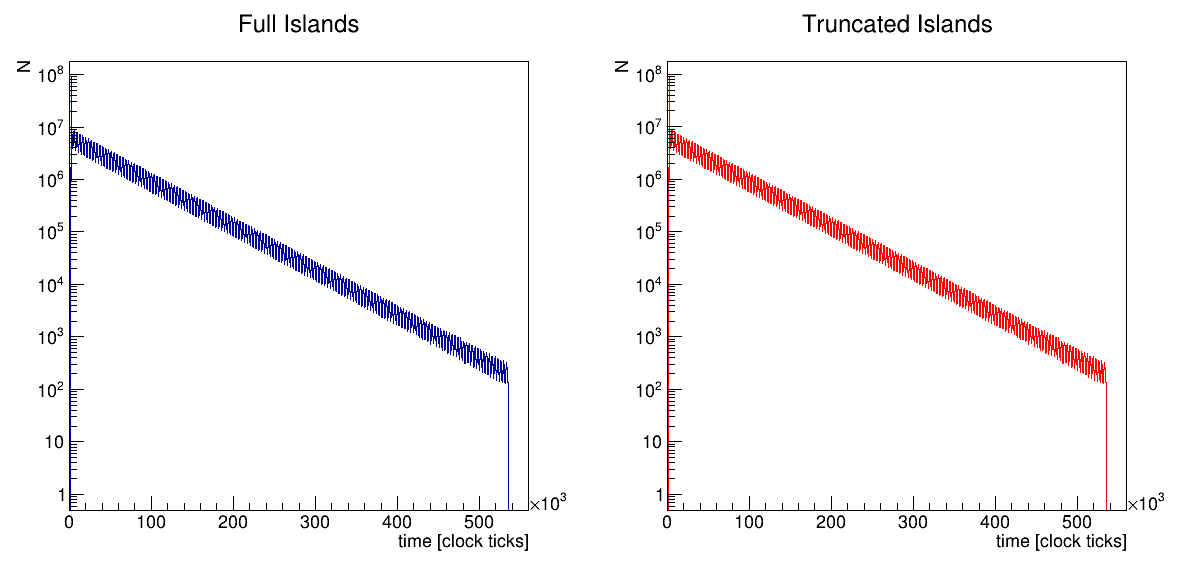

In [94]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)

c.cd(1)
w1.Draw()
r.gPad.SetLogy()

c.cd(2)
#w1.GetXaxis().SetRangeUser(24000,70000)
w2.Draw("")
r.gPad.SetLogy()

c.Draw()

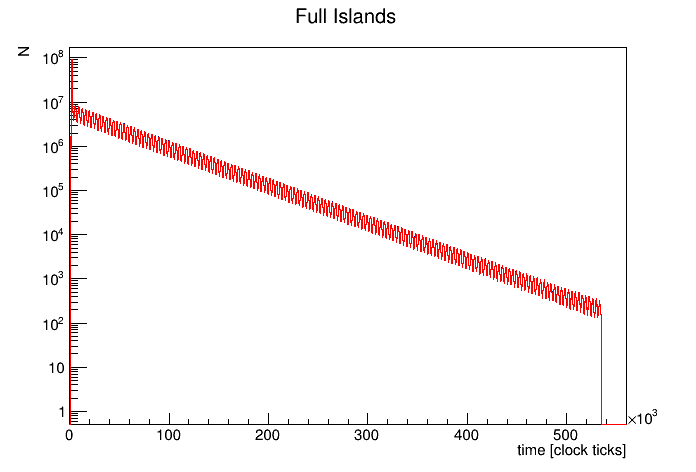

In [95]:
c = r.TCanvas()
w1.Draw()
#w1.GetXaxis().SetRangeUser(24000,70000)
w2.Draw("same")
c.SetLogy()
c.Draw()

In [96]:
wdiff = w1.Clone("wdiff")
wdiff.GetXaxis().UnZoom()
wdiff.Add(w2,-1)
wdiff.SetTitle("Wiggle_{full islands} - Wiggle_{truncated islands}; Time [c.t.]; N")

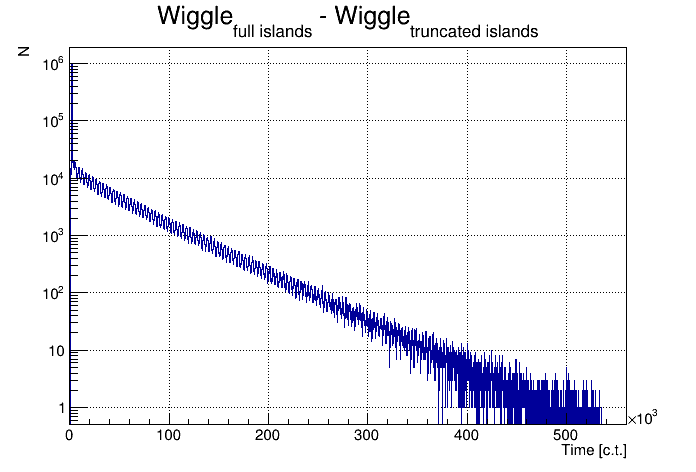

In [97]:
c = r.TCanvas()
wdiff.Draw()
c.SetGrid()
c.SetLogy()
c.Draw()

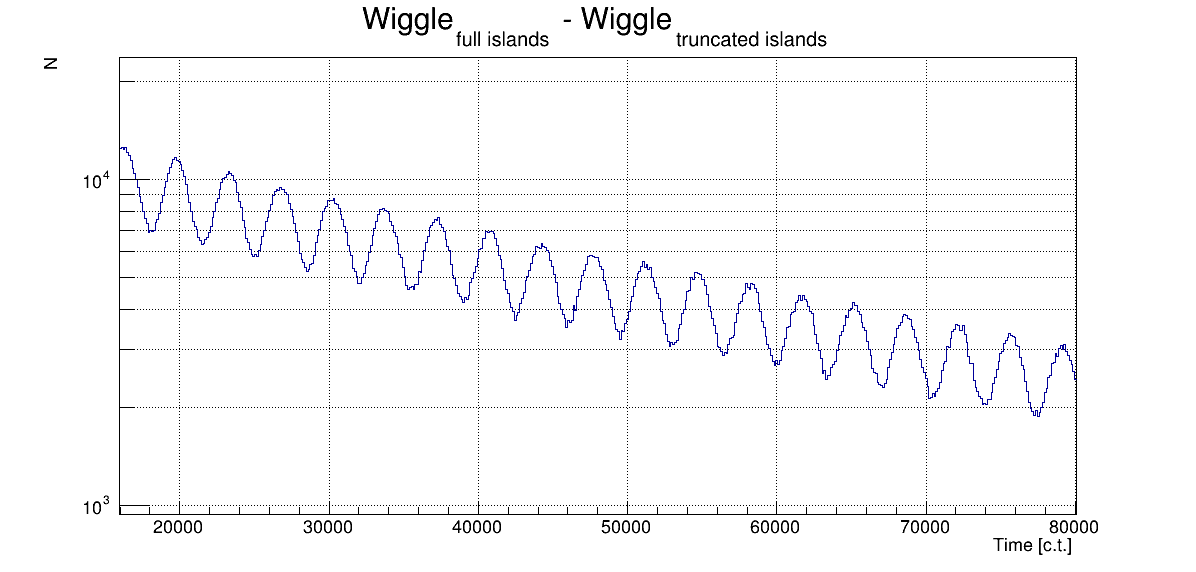

In [98]:
c = r.TCanvas("c","c",1200,600)
wdiff.GetXaxis().SetRangeUser(20*1000/1.25,100*1000/1.25)
wdiff.Draw()
c.SetGrid()
c.SetLogy()
c.Draw()

In [99]:
tMin = 30*1000/1.25
print(wdiff.Integral(), "/", wdiff.Integral(wdiff.FindBin(tMin),-1))

2771324.0 / 3159718.0


---

# Energy

In [100]:
e1 = f.Get("farline").Get("allCaloEnergies").Clone("e1")
e2 = f.Get("farlineTrunc").Get("allCaloEnergies").Clone("e2")
e2.SetLineColor(2)

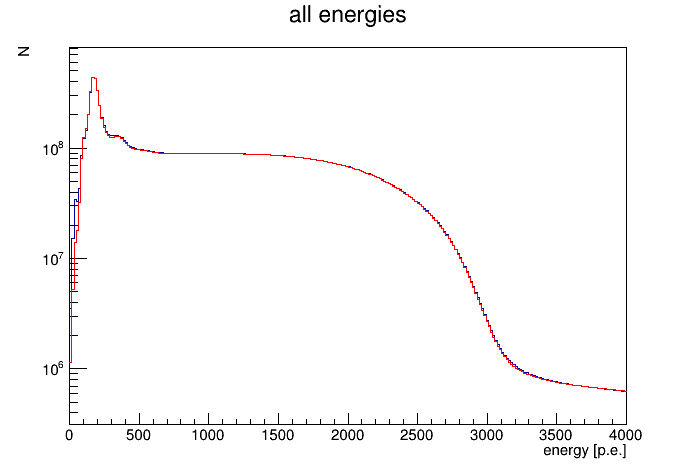

In [101]:
c = r.TCanvas()
e1.Draw()
e1.GetXaxis().SetRangeUser(0,4000)
e2.Draw("same")
c.SetLogy()
c.Draw()

In [102]:
ediff = e1.Clone("ediff")
ediff.Add(e2,-1)
ediff.SetTitle("E_{full islands} - E_{truncated islands} [MeV]; Energy [MeV]; N")

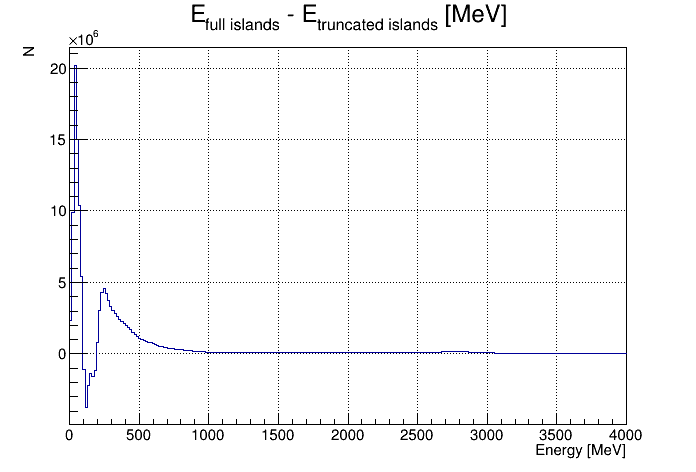

In [103]:
c = r.TCanvas()
ediff.GetXaxis().SetRangeUser(0,4000)
ediff.Draw()
c.SetGrid()
c.Draw()

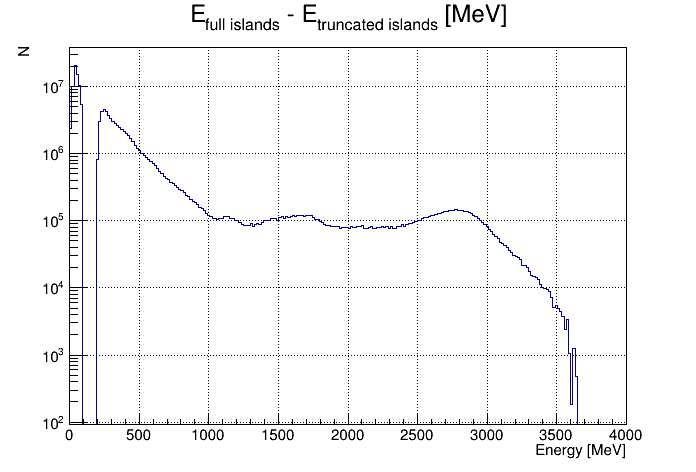

In [104]:
c = r.TCanvas()
ediff.GetXaxis().SetRangeUser(0,4000)
ediff.Draw()
c.SetGrid()
c.SetLogy()
c.Draw()

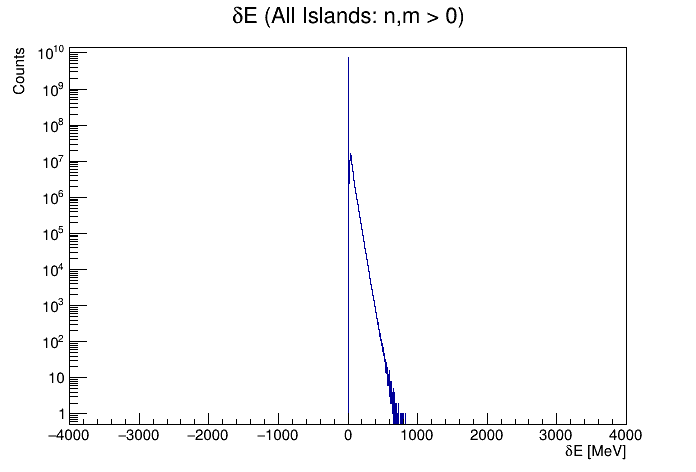

In [105]:
evwDeltaEAll = f.Get("clusterCompare").Get("evwDeltaEAll").Clone()
c = r.TCanvas()
evwDeltaEAll.Draw()
c.SetLogy()
c.Draw()

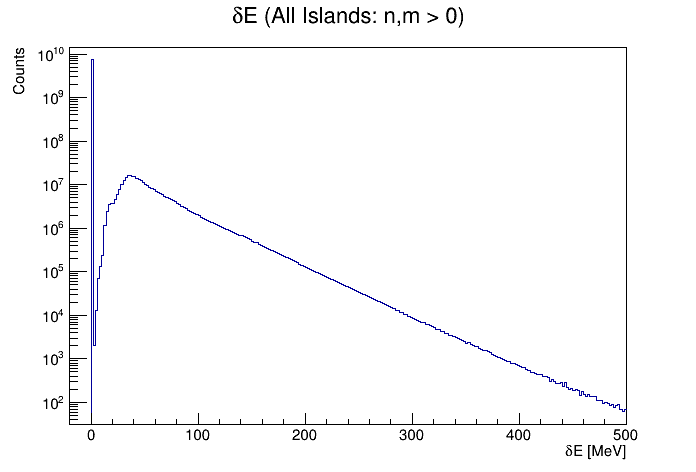

In [106]:
evwDeltaEAll.GetXaxis().SetRangeUser(-20,500)
evwDeltaEAll.Draw()
c.SetLogy()
c.Draw()

---

# All times, no energy cut

In [107]:
t1 = f.Get("farline").Get("allCaloTimes").Clone("t1")
t2 = f.Get("farlineTrunc").Get("allCaloTimes").Clone("t2")
t2.SetLineColor(2)

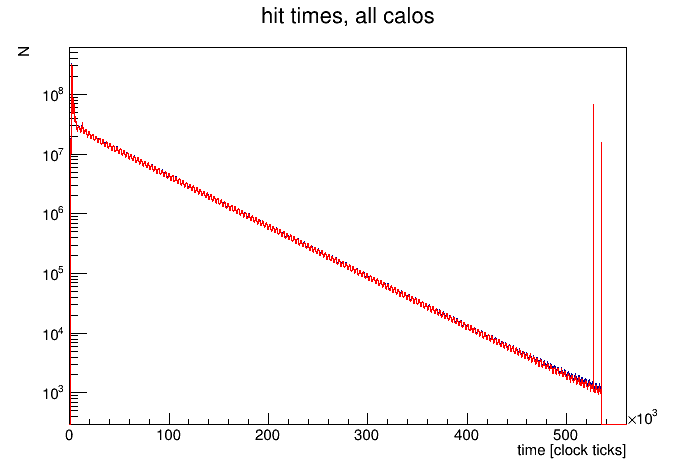

In [108]:
c = r.TCanvas()
t1.Draw()
#e1.GetXaxis().SetRangeUser(24000,70000)
t2.Draw("same")
c.SetLogy()
c.Draw()

In [109]:
tdiff = t1.Clone("ediff")
tdiff.Add(t2,-1)
tdiff.SetTitle("t_{full islands} - t_{truncated islands} [c.t.]; Time in Fill [c.t.]; N")

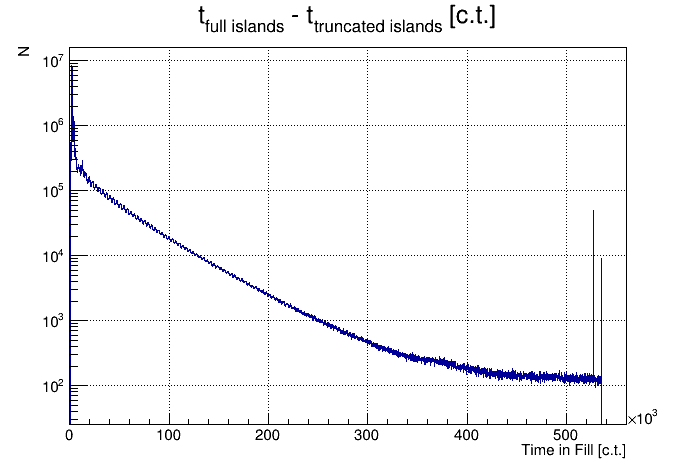

In [110]:
c = r.TCanvas()
tdiff.Draw()
c.SetGrid()
c.SetLogy()
c.Draw()

---

# CTAG

In [111]:
ctag1 = f.Get("farline").Get("farlineCTag").Clone("ctag1")
ctag2 = f.Get("farlineTrunc").Get("farlineCTag").Clone("ctag2")
ctag2.SetLineColor(2)

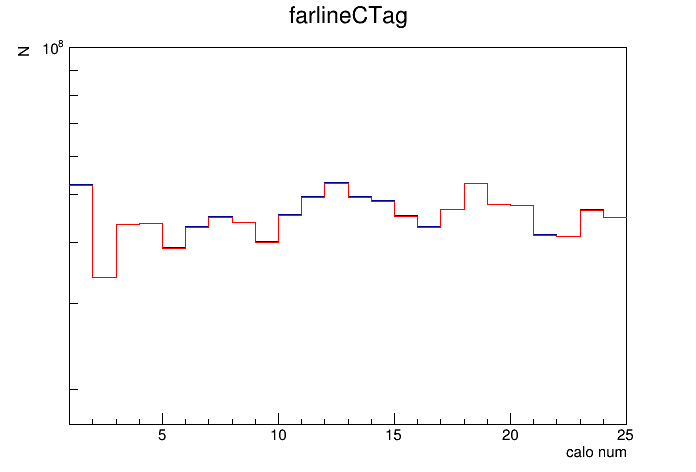

In [112]:
c = r.TCanvas()
ctag1.Draw()
#e1.GetXaxis().SetRangeUser(24000,70000)
ctag2.Draw("same")
c.SetLogy()
c.Draw()

In [113]:
ctagdiff = ctag1.Clone("ctagdiff")
ctagdiff.Add(ctag2,-1)
ctagdiff.SetTitle("CTAG_{full islands} - CTAG_{truncated islands}; Calorimeter Number; N")

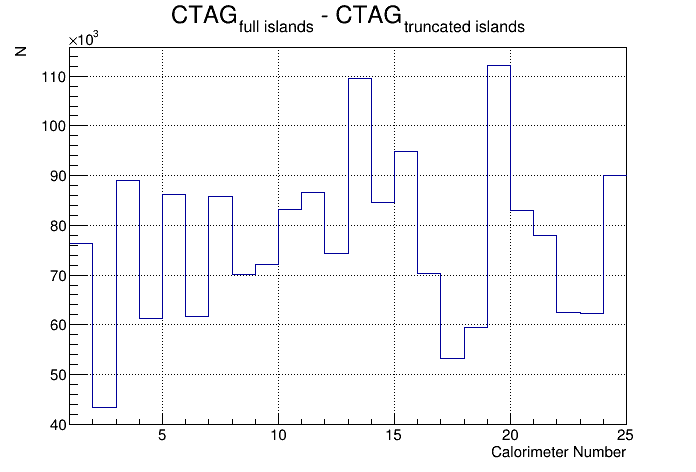

In [114]:
c = r.TCanvas()
#ctagdiff.GetYaxis().SetRangeUser(-10,10)
ctagdiff.Draw("")
c.SetGrid()
c.Draw()

---

# Aaron's Clustering

In [115]:
clusters = f.Get("clustersAndCoincidences").Get("clusters").Clone("clusters")
clustersTrunc = f.Get("clustersAndCoincidencesTrunc").Get("clusters").Clone("clustersTrunc")

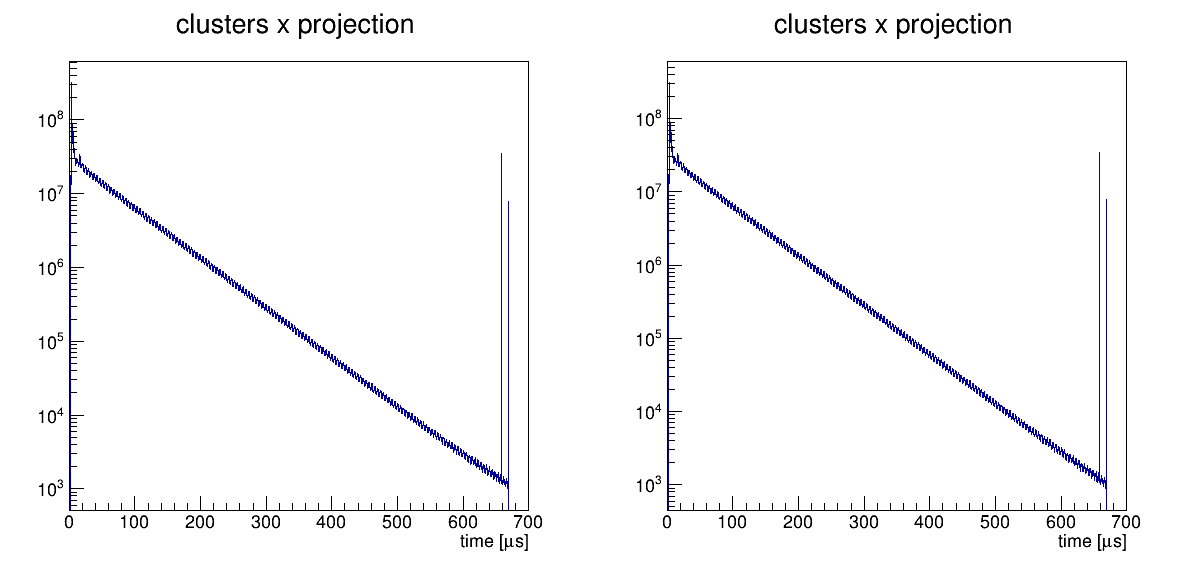

In [116]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)

c.cd(1)
clusters.Project3D("x").Draw()
r.gPad.SetLogy()

c.cd(2)
clustersTrunc.Project3D("x").Draw()
r.gPad.SetLogy()

c.Draw()

In [117]:
clusters_x_diff = clusters.Project3D("x").Clone()
clusters_x_diff.Add(clustersTrunc.Project3D("x"), -1)

True

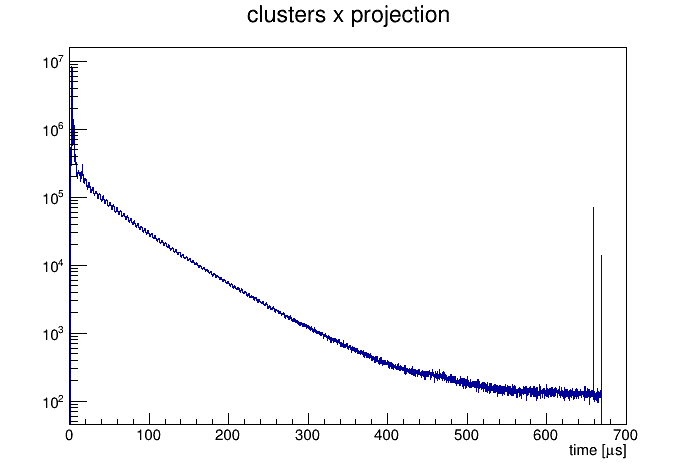

In [118]:
c = r.TCanvas()
clusters_x_diff.Draw()
c.SetLogy()
c.Draw()

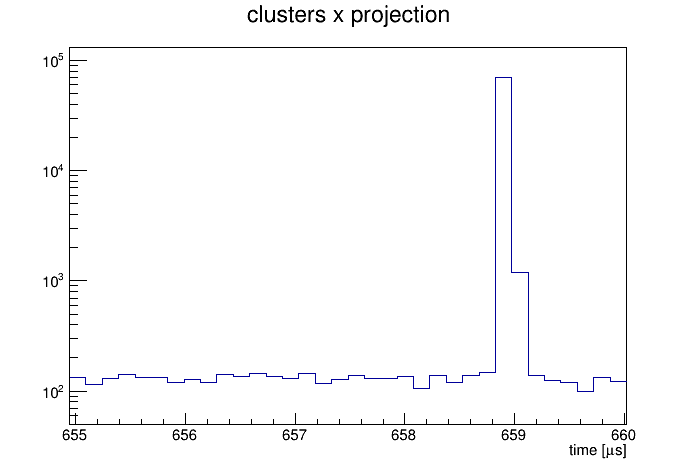

In [119]:
clusters_x_diff.GetXaxis().SetRangeUser(655,660)
c.Draw()

---

# Direct cluster comparison

In [120]:
counterHist = f.Get("clusterCompare").Get("counterHist").Clone()

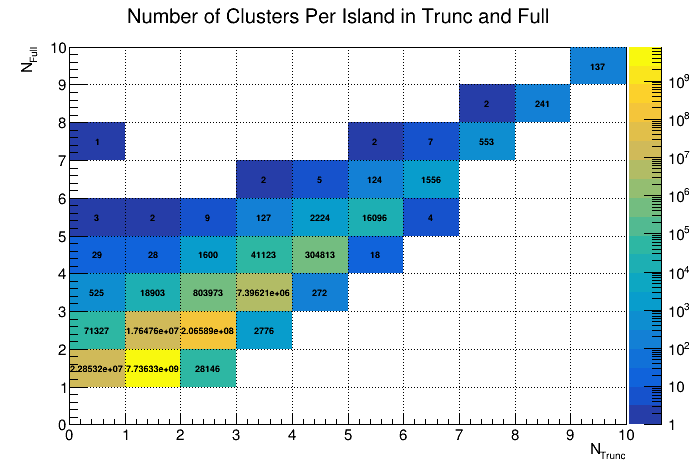

In [121]:
c = r.TCanvas()
counterHist.Draw("COLZ text")
counterHist.GetXaxis().SetRangeUser(0,10)
counterHist.GetYaxis().SetRangeUser(0,10)
c.SetLogz()
c.SetGrid()
c.Draw()

In [122]:
evwDeltaEAll = f.Get("clusterCompare").Get("evwDeltaEAll").Clone()
#evwDeltaEAll.Rebin(2)

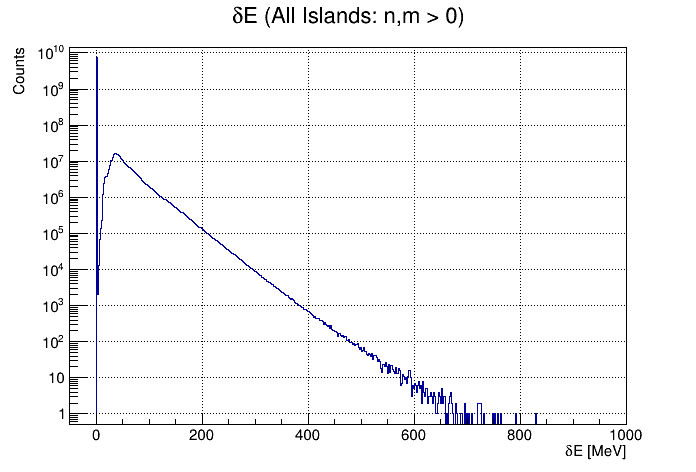

In [123]:
c = r.TCanvas()
#evwDeltaEAll.GetXaxis().SetRangeUser(-50,1000)
evwDeltaEAll.GetXaxis().SetRangeUser(-50,1000)

evwDeltaEAll.Draw()
c.SetLogy()
c.SetGrid()
c.Draw()

In [124]:
print(evwDeltaEAll.GetMean())

3.5027488301631697


In [125]:
print( evwDeltaEAll.Integral(evwDeltaEAll.FindBin(200), -1) ,evwDeltaEAll.Integral() ) 
print( evwDeltaEAll.Integral(evwDeltaEAll.FindBin(200), -1) / evwDeltaEAll.Integral() *100, "%") 

2430340.0 7969185326.0
0.030496718304076242 %


In [126]:
evwDeltaEAll.Integral(1, -1) 

7969185326.0

In [127]:
print( evwDeltaEAll.Integral(evwDeltaEAll.FindBin(0), evwDeltaEAll.FindBin(1)) / evwDeltaEAll.Integral() *100, "%") 

95.6232439611858 %


In [128]:
evwEnergyEvW = f.Get("clusterCompare").Get("evwEnergyEvW").Clone()
evwEnergyEvW.Rebin2D(2,2)

<ROOT.TH2D object ("evwEnergyEvW") at 0x7fffe0a18260>

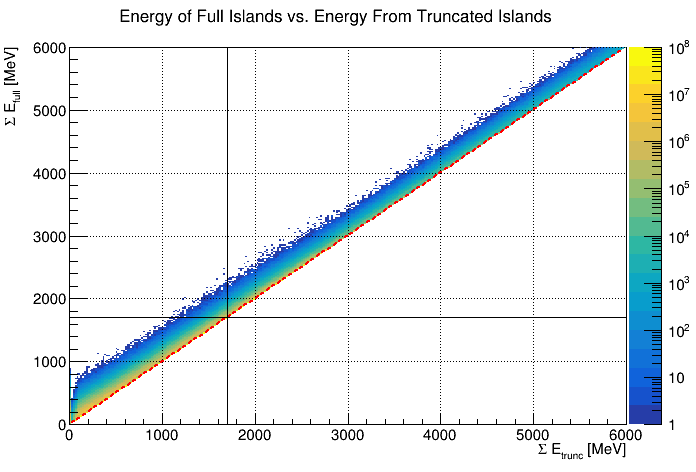

In [129]:
c = r.TCanvas()
evwEnergyEvW.Draw("colz")
#c.SetLogx()
#c.SetLogy()
evwEnergyEvW.SetTitle("Energy of Full Islands vs. Energy From Truncated Islands; #Sigma E_{trunc} [MeV]; #Sigma E_{full} [MeV]")
c.SetLogz()

onetoone = r.TF1("onetoone","pol1",0,6000)
onetoone.SetParameters(0,1)
onetoone.SetLineStyle(8)
onetoone.Draw("same")

threshold1 = r.TLine(1700,0,1700,6000)
threshold1.Draw()

threshold2= r.TLine(0,1700,6000,1700)
threshold2.Draw()

c.SetGrid()

c.Draw()

In [130]:
evwEnergyEvW_Full = evwEnergyEvW.ProjectionY()
evwEnergyEvW_Trunc = evwEnergyEvW.ProjectionX()

Nfull = evwEnergyEvW_Full.Integral( evwEnergyEvW_Full.FindBin(1700), -1 )
Ntrunc = evwEnergyEvW_Trunc.Integral( evwEnergyEvW_Trunc.FindBin(1700), -1 )
print(Nfull, Ntrunc)

2225494727.0 2221203139.0


In [131]:
print(Nfull - Ntrunc)
print((Nfull - Ntrunc)/Nfull*100)

4291588.0
0.19283748228804498


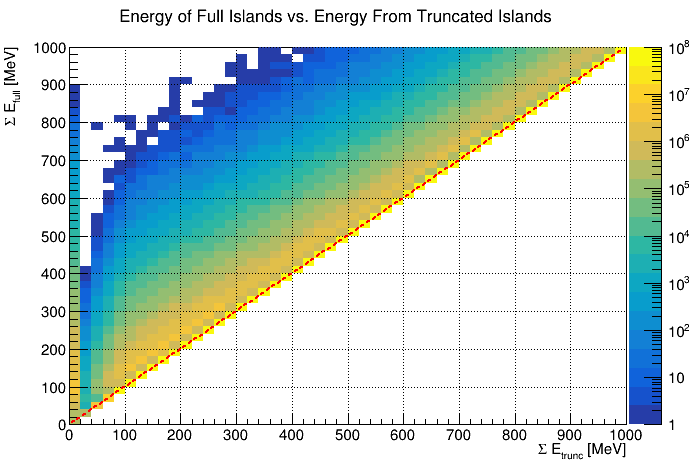

In [132]:
c = r.TCanvas()
evwEnergyEvW.GetYaxis().SetRangeUser(0,1000)
evwEnergyEvW.GetXaxis().SetRangeUser(0,1000)
evwEnergyEvW.Draw("colz")
#c.SetLogx()
#c.SetLogy()
c.SetLogz()

onetoone.Draw("same")
c.SetGrid()

c.Draw()

In [133]:
counterFullVsTime = f.Get("clusterCompare").Get("counterFullVsTime").Clone()
counterTruncVsTime = f.Get("clusterCompare").Get("counterTruncVsTime").Clone()

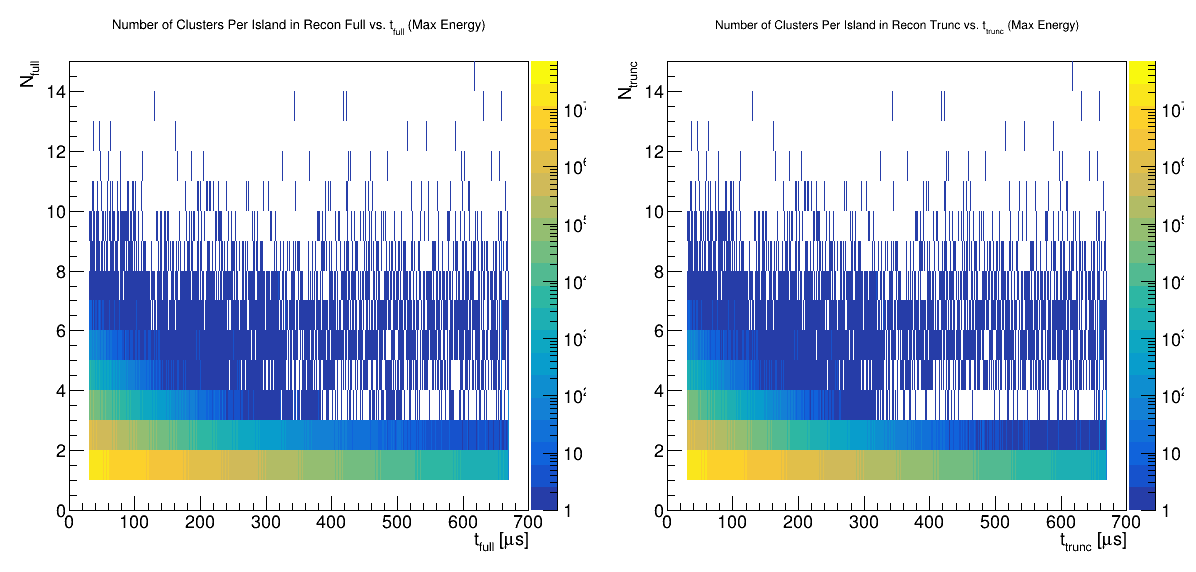

In [134]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)

c.cd(1)
counterFullVsTime.Draw("colz")
r.gPad.SetLogz()

c.cd(2)
counterTruncVsTime.Draw("colz")
r.gPad.SetLogz()

c.Draw()

In [135]:
evwEnergyEvW.GetXaxis().UnZoom()
evwEnergyEvW.GetYaxis().UnZoom()
evwEnergyEvW_y = evwEnergyEvW.ProfileX().Clone()

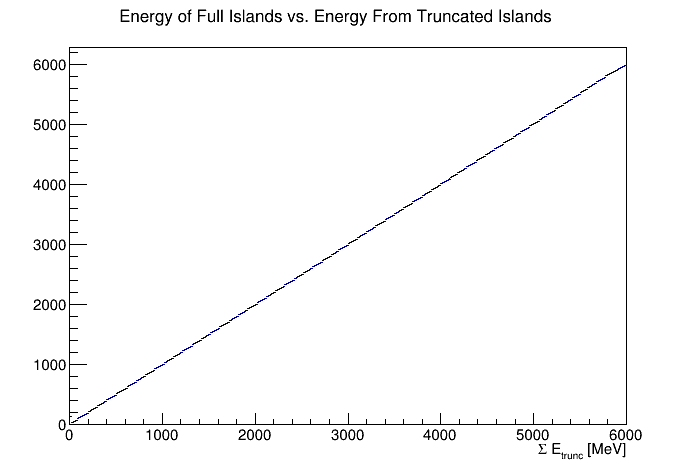

In [136]:
c = r.TCanvas()
evwEnergyEvW_y.Draw()
c.Draw()

In [137]:
evwEnergyEvW_y.GetBinContent(20)

394.32389225922554

In [138]:
evwEnergyEvW_ratio = evwEnergyEvW.ProjectionY().Clone("evwEnergyEvW_ratio")
evwEnergyEvW_ratio.Reset()
evwEnergyEvW_ratio.SetTitle("Ratio of #bar{E}_{full} to E_{trunc} vs. E_{trunc}; E_{trunc} [MeV]; E_{full} / E_{trunc}")

In [139]:
for i in range(evwEnergyEvW_y.GetNbinsX() + 1):
    binCenter = evwEnergyEvW.GetYaxis().GetBinCenter(i)
    binContent = evwEnergyEvW_y.GetBinContent(i)
    binError = evwEnergyEvW_y.GetBinError(i)
    #print(binContent, binCenter)
    evwEnergyEvW_ratio.SetBinContent(i, binContent / binCenter)
    evwEnergyEvW_ratio.SetBinError(i, binError / binCenter)

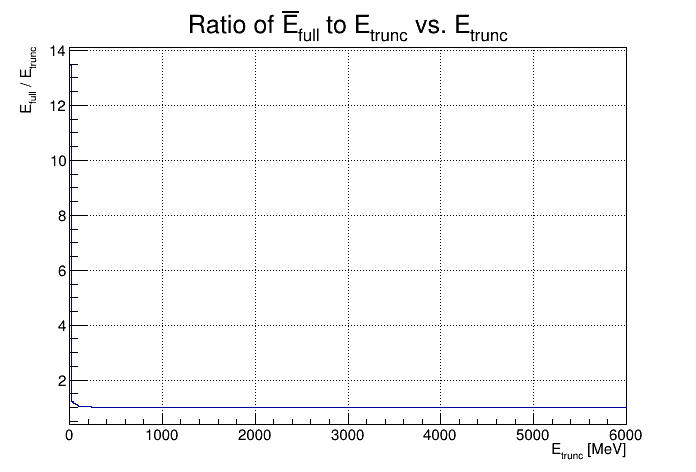

In [140]:
c = r.TCanvas()
evwEnergyEvW_ratio.Draw("hist e")
#c.SetLogy()
c.SetGrid()
c.Draw()

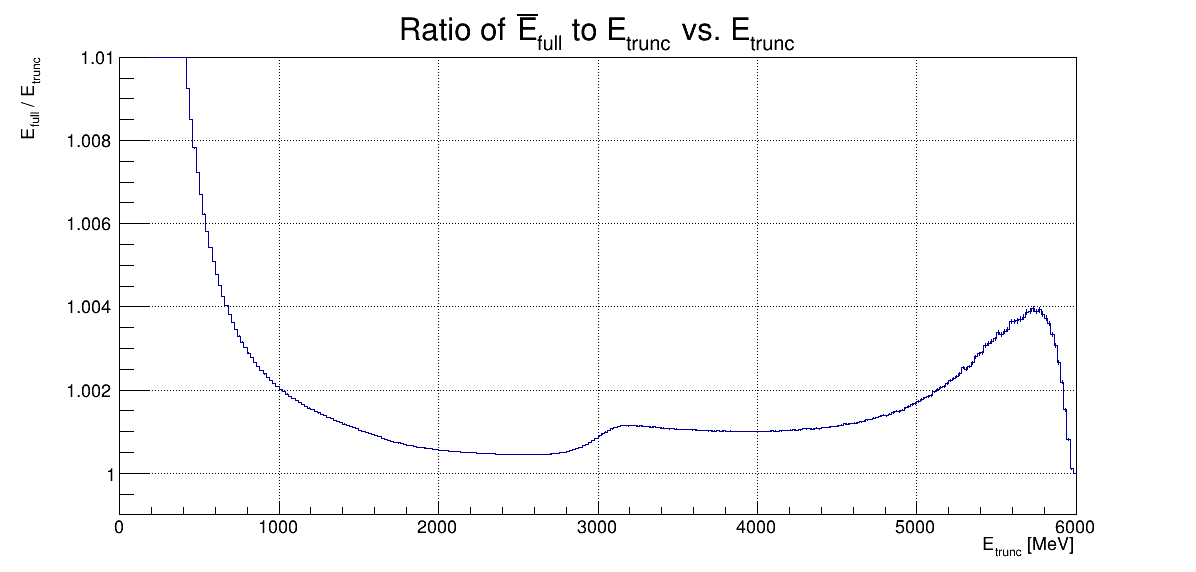

In [141]:
c = r.TCanvas("c","c",1200,600)
evwEnergyEvW_ratio.GetYaxis().SetRangeUser(0.999,1.01)
evwEnergyEvW_ratio.Draw("hist e")
c.SetGrid()
c.Draw()

In [147]:
binContents = []
for i in range(evwEnergyEvW_ratio.GetNbinsX()):
    center = evwEnergyEvW_ratio.GetXaxis().GetBinCenter(i)
    if(center > 1700 and center < 3100):
        binContents.append( 1/evwEnergyEvW_ratio.GetBinContent(i) )

In [148]:
np.mean(binContents)

0.9994246715062934

---

### Triples

In [53]:
triples = f.Get("clustersAndCoincidences").Get("triples").Clone("triples")
triplesTrunc = f.Get("clustersAndCoincidencesTrunc").Get("triples").Clone("triplesTrunc")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


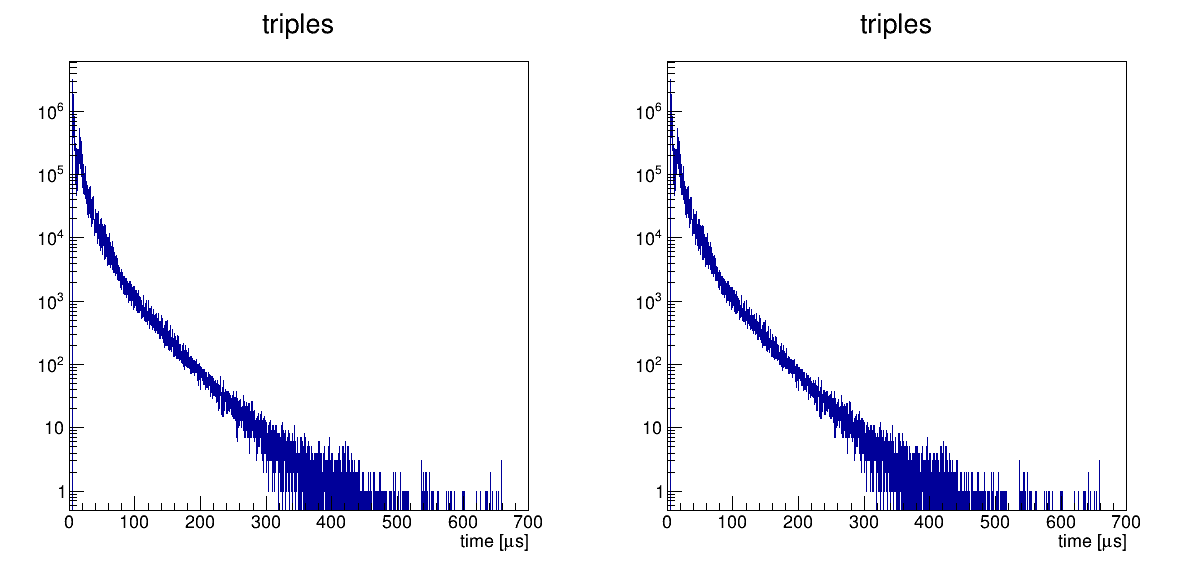

In [54]:
c = r.TCanvas("c","c",1200,600)
c.Divide(2)
c.cd(1)
triples.ProjectionX().Draw()
r.gPad.SetLogy()
c.cd(2)
triplesTrunc.ProjectionX().Draw()
r.gPad.SetLogy()

c.Draw()

In [55]:
from fit_util import *

In [56]:
tripDiff = triples.ProjectionX().Clone()
tripDiff.Add(triplesTrunc.ProjectionX(), -1)
tripDiff.SetLineColor(38)
tripDiff.SetFillColorAlpha(38,0.3)

tripDiffInv = InvertTH1(tripDiff, None, 45, 0.3).Clone()

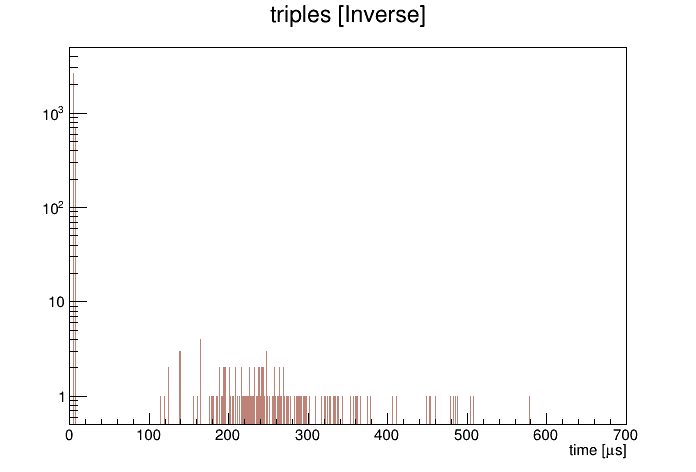

In [57]:
c = r.TCanvas()
tripDiffInv.Draw()
c.SetLogy()
c.Draw()

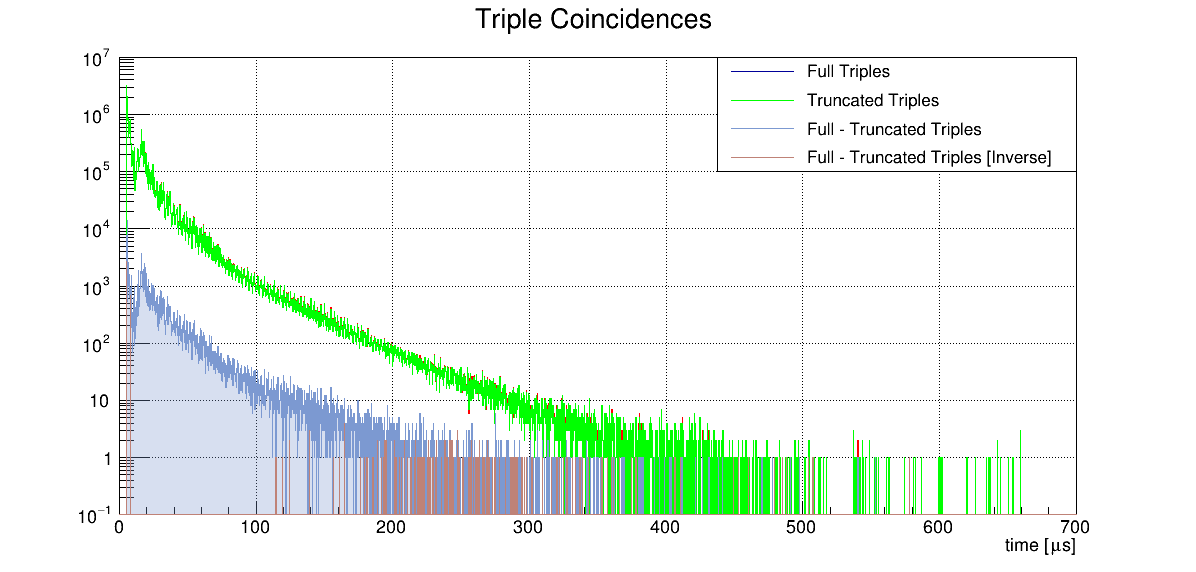

In [58]:
c = r.TCanvas("c","c",1200,600)

ty = triples.ProjectionX().Clone()
ty.GetXaxis().SetRangeUser(0,800)
ty.GetYaxis().SetRangeUser(0.1,10**7)
ty.SetTitle("Triple Coincidences")
ty.SetLineColor(2)
ty.Draw()

triplesTrunc.SetLineColor(3)
triplesTrunc.ProjectionX().Draw("same")

tripDiff.Draw("same")
tripDiffInv.Draw("SAME")
c.SetLogy()
c.SetGrid()

leg = r.TLegend(0.6,0.7,0.9,0.9)
leg.AddEntry(triples,"Full Triples","l")
leg.AddEntry(triplesTrunc,"Truncated Triples","l")
leg.AddEntry(tripDiff,"Full - Truncated Triples","l")
leg.AddEntry(tripDiffInv,"Full - Truncated Triples [Inverse]","l")
leg.Draw()

c.Draw()

In [59]:
tripRatio = tripDiff.Clone()
tripRatio.SetTitle("Missing Triples vs. Time; Time [#mus]; (triples_{full} - triples_{trunc}) / triples_{full} * 100 [% Difference]")
tripRatio.GetXaxis().UnZoom()
ty.GetXaxis().UnZoom()
for i in range(tripRatio.GetNbinsX()+1):
    if( ty.GetBinContent(i) > 0 ):
        tripRatio.SetBinContent( i , tripRatio.GetBinContent(i) / ty.GetBinContent(i) * 100 )
    else:
        tripRatio.SetBinContent( i , 0 )
        
tripRatio.Rebin(6)
tripRatioInv = InvertTH1(tripRatio, None, 45, 0.3).Clone()

 FCN=5831.46 FROM MIGRAD    STATUS=CONVERGED      75 CALLS          76 TOTAL
                     EDM=1.3401e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.49209e+00   7.44601e-01   3.91624e-03  -3.65492e-03
   2  p1           1.96584e-01   9.01426e-02   2.06172e-03  -1.65677e-03
   3  p2           3.66618e-02   1.41841e-01   7.26321e-04  -1.96580e-02
 FCN=5831.46 FROM MIGRAD    STATUS=CONVERGED      39 CALLS          40 TOTAL
                     EDM=6.2858e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.49209e+00   7.44497e-01   3.91624e-03  -1.20206e-04
   2  p1           1.96584e-01   9.01651e-02   2.06163e-03   3.72868e-03
   3  p2           3.66644e-02   1.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


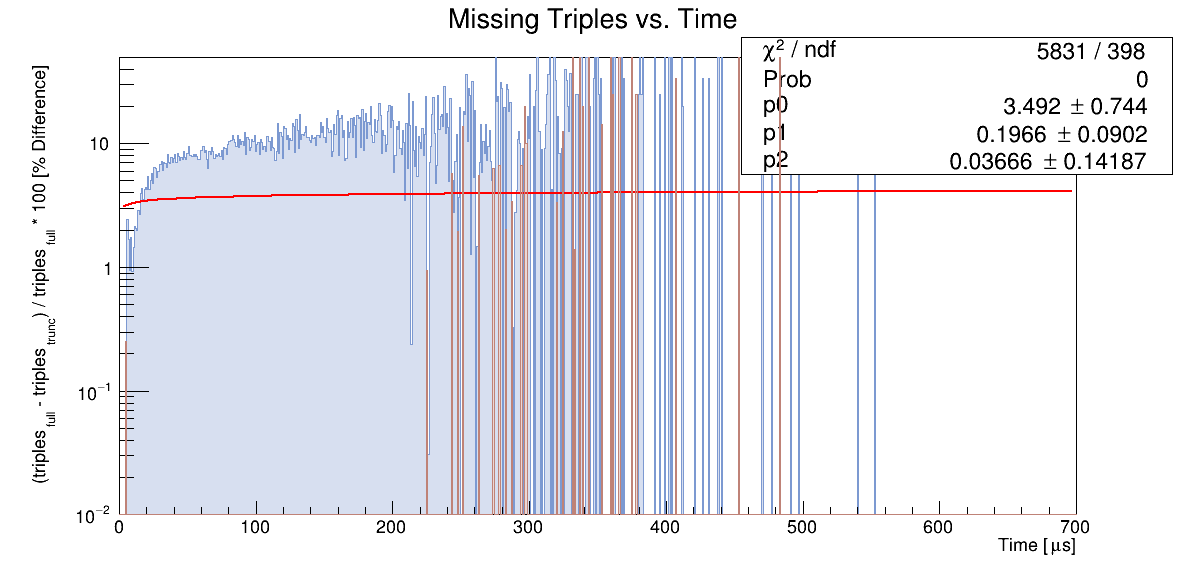

In [60]:
c = r.TCanvas("c","c",1200,600)
tripRatio.Draw()
func = r.TF1("func","[0] + [1]*TMath::Log(x*[2])",0,200)
tripRatio.GetYaxis().SetRangeUser(0.01,50)
func.SetParameters(1,0.5,0.02)
for i in range(2):
    tripRatio.Fit("func","")
tripRatioInv.Draw("SAME")
c.SetLogy()
c.Draw()

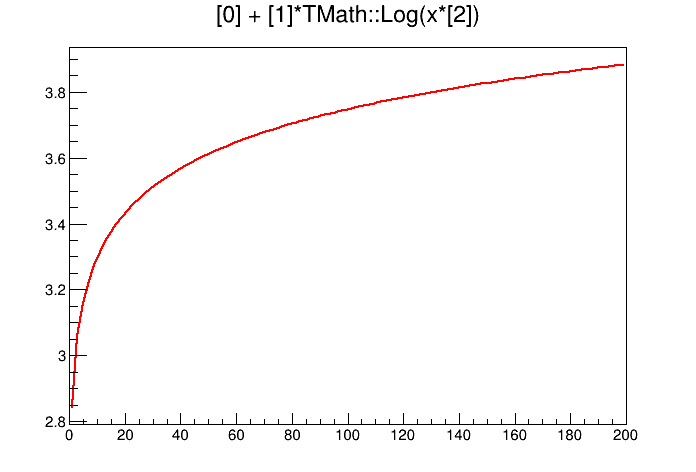

In [61]:
c = r.TCanvas()
func.Draw()
c.Draw()